In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import numpy as np
sys.path.append('/home/tammy.kojima/Authorship-attribution/')
import selection_ml as sml

In [2]:
df = pd.read_csv("/home/tammy.kojima/Authorship-attribution/df_pronto/df_gpt_com_features.csv")
feature_columns = [col for col in df.columns if col not in ['text', 'origin']]

In [48]:
df

,text,origin,lexical_type_token_ratio,lexical_word_count,lexical_unique_words,lexical_avg_word_length,lexical_word_length_variance,lexical_stopword_ratio,stylistic_random_uppercase,stylistic_repeated_chars,...,vote for,wait,watch,watching,wish,with modi,without,yeah,yes,you have
0,"Our rules are the most robust, the president c...",1,0.882353,17,15,5.294118,6.442907,0.411765,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,...associating outsiders with danger and extre...,1,1.000000,18,18,6.000000,9.000000,0.277778,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,...alarms were raised in the initial stages of...,1,0.937500,32,30,4.968750,4.655273,0.437500,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[The opposition] utilizes every tool to questi...,1,0.727273,22,16,5.409091,8.787190,0.500000,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[The governor's] fixation with health protocol...,1,0.923077,13,12,6.153846,7.207101,0.384615,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,very happy best candidate for bangalore south ...,0,0.909091,11,10,4.909091,4.264463,0.181818,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199996,you made country islam you are proud lets beli...,0,0.731707,41,30,4.317073,2.070196,0.195122,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199997,kannauj and allahabad will difficult for bjp t...,0,0.840000,25,21,5.760000,8.502400,0.160000,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199998,truth toh lakh aney hain aur 6000 bas choose k...,0,0.933333,15,14,5.600000,7.173333,0.000000,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df= df.drop(columns=['text']) 

In [4]:
df = df.fillna(0)

📊 Calculando Mutual Information...
🔍 Removendo features redundantes...
   🔄 Removendo 'stylistic_capitalization_inconsistency' (correlacionada com 'stylistic_capitalization_inconsistency.1': 0.924)
   🔄 Removendo 'co' (correlacionada com 'https': 0.893)
   🔄 Removendo 'https co' (correlacionada com 'https': 0.911)
   🔄 Removendo 'structural_has_url' (correlacionada com 'https': 0.888)
   🔄 Removendo 'lexical_unique_words' (correlacionada com 'syntactic_avg_sentence_length': 0.869)
   🔄 Removendo 'lexical_word_count' (correlacionada com 'syntactic_avg_sentence_length': 0.857)
   🔄 Removendo 'stylistic_random_uppercase' (correlacionada com 'stylistic_random_uppercase.1': 1.000)
   🔄 Removendo 'syntactic_pos_bigram_entropy' (correlacionada com 'syntactic_pos_tag_entropy': 0.881)
   🔄 Removendo 'climate change' (correlacionada com 'climate': 0.944)
   🔄 Removendo 'change' (correlacionada com 'climate': 0.932)
   🔄 Removendo 'covid 19' (correlacionada com 'covid': 0.829)
   🔄 Removendo '19'

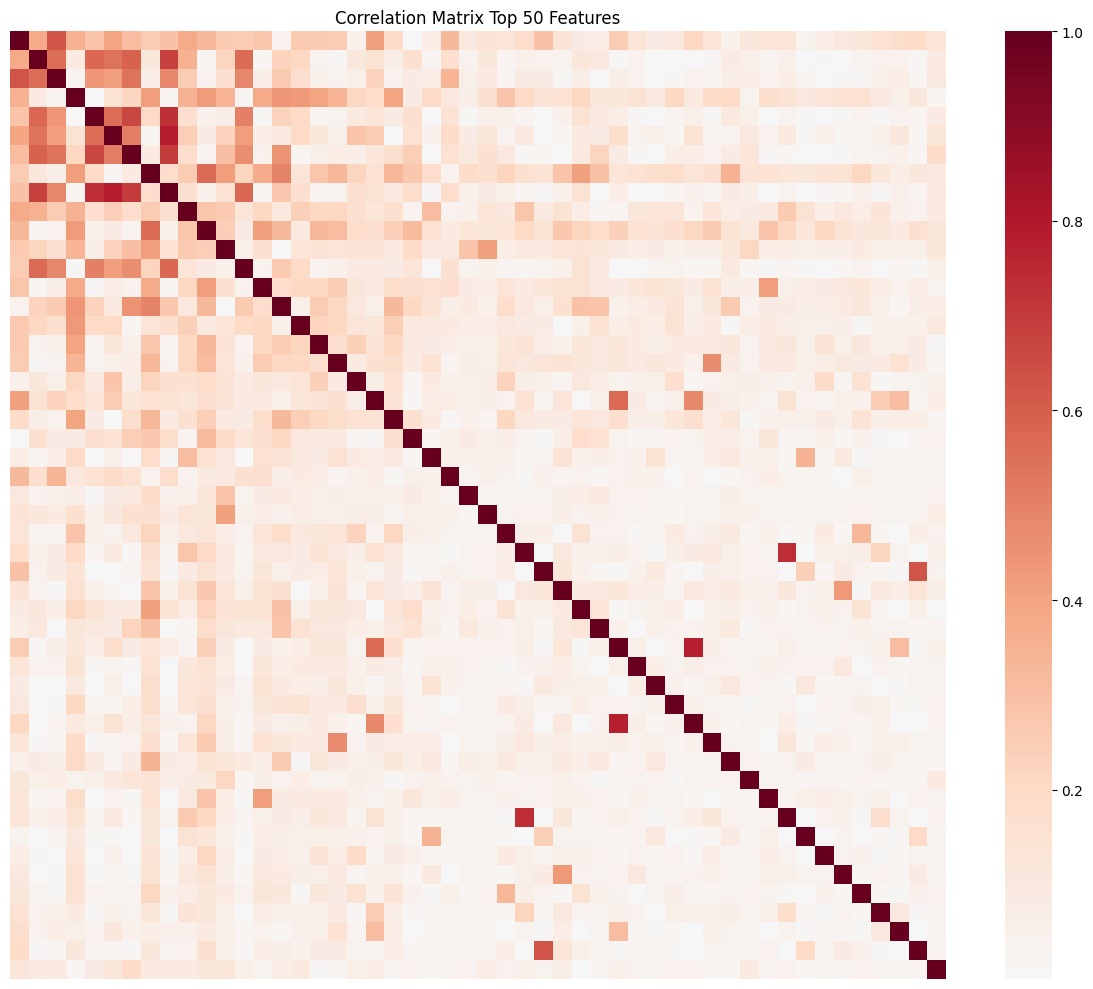


📋 RELATÓRIO FINAL DA SELEÇÃO DE FEATURES
Total de features inicial: 434
Features após MI: 434
Features após remoção de redundâncias: 406


In [5]:
# Executar a validação completa
mi_df_final = sml.validate_feature_selection(
    df=df,
    feature_names=feature_columns,
    target='origin',
    top_n_range=range(10, 101, 10),  # Testa de 10 a 100 features em steps de 10
    cv_folds=5,
    correlation_threshold=0.8
)
mi_df_final.to_csv("/home/tammy.kojima/Authorship-attribution/df_pronto/top_features_gpt.csv", index=False)

In [3]:
top_features = pd.read_csv("/home/tammy.kojima/Authorship-attribution/df_pronto/top_features_gpt.csv")
top20_features = top_features.head(20)

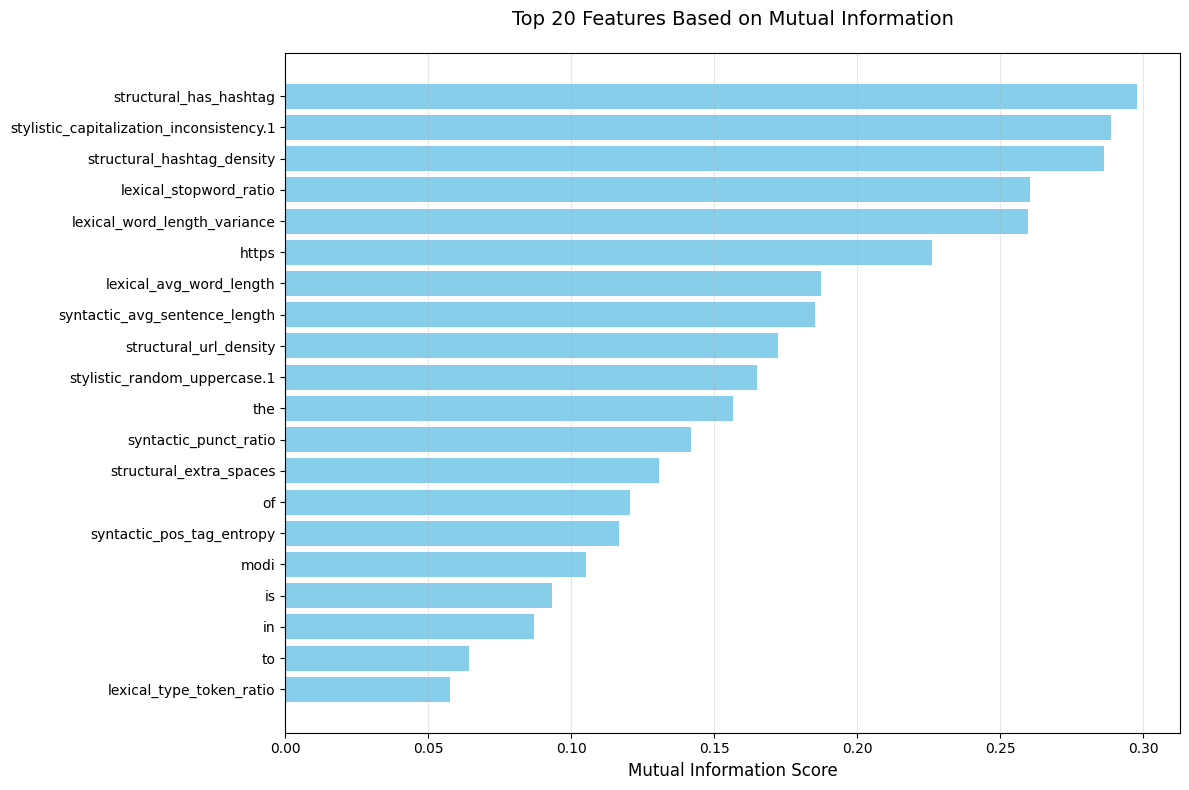

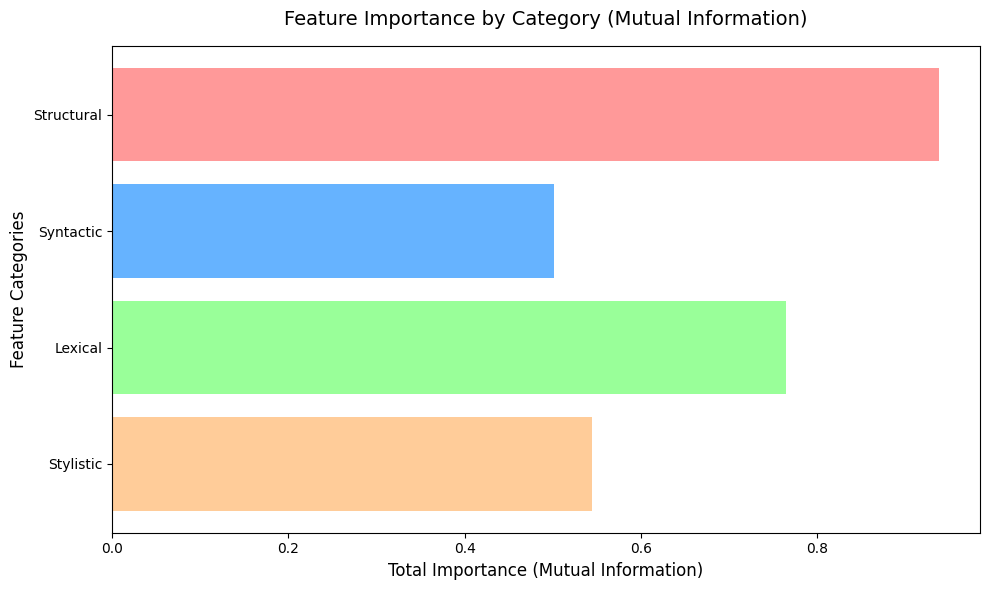

In [3]:
categories = {
    'Structural': ['structural'],
    'Syntactic': ['syntactic'],
    'Lexical': ['lexical'],
    'Stylistic': ['stylistic']
}
sml.plot_feature_20importance(top20_features)
sml.plot_feature_importance(top_features, top_n=20, categories=categories)

In [4]:
X = df[top20_features['feature'].tolist()]
y = df['origin'].astype(int)

In [9]:
#VERIFICAÇÃO DE OUTLIERS 
outliers = {}

for col in X.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Índices com outliers
    outlier_idx = df[(df[col] < lower) | (df[col] > upper)].index
    outliers[col] = len(outlier_idx)

# Mostrar número de outliers por coluna
outliers

{'structural_has_hashtag': 0,
 'stylistic_capitalization_inconsistency.1': 15561,
 'structural_hashtag_density': 23822,
 'lexical_stopword_ratio': 11,
 'lexical_word_length_variance': 22196,
 'https': 41,
 'lexical_avg_word_length': 8764,
 'syntactic_avg_sentence_length': 101,
 'structural_url_density': 16475,
 'stylistic_random_uppercase.1': 0,
 'the': 88,
 'syntactic_punct_ratio': 39856,
 'structural_extra_spaces': 16882,
 'of': 1066,
 'syntactic_pos_tag_entropy': 9241,
 'modi': 27683,
 'is': 156,
 'in': 359,
 'climate': 22454,
 'trump': 20699}

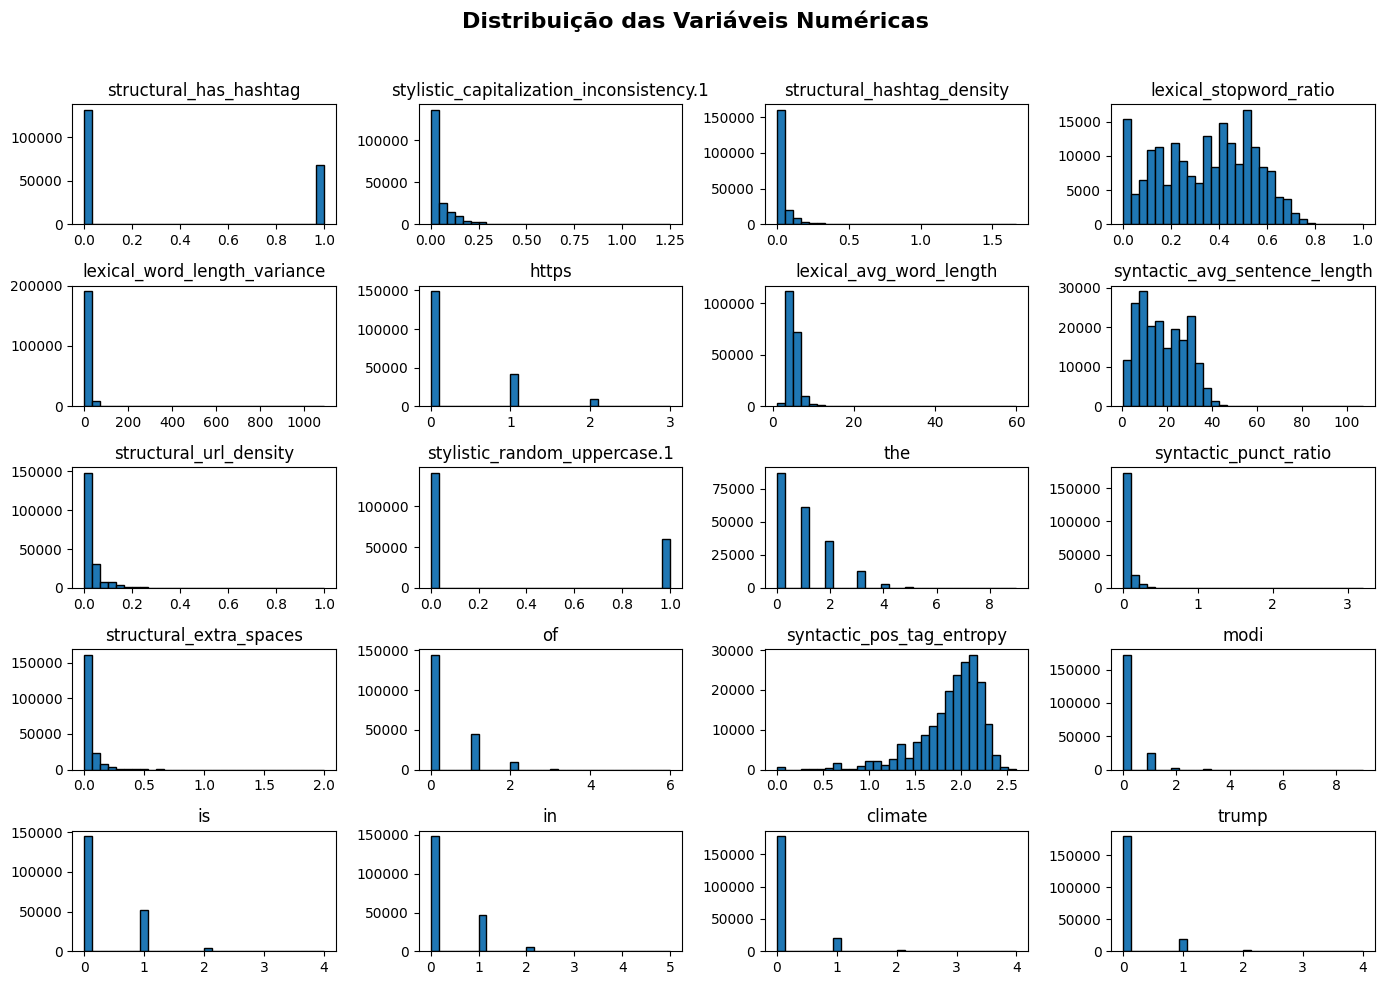

In [10]:
X.hist(figsize=(14,10), bins=30, edgecolor='black', grid=False)
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o título
plt.show()


📊 RESULTADOS DA VALIDAÇÃO CRUZADA:
----------------------------------------
accuracy    : 0.9865 ± 0.0008
precision   : 0.9885 ± 0.0005
recall      : 0.9844 ± 0.0011
f1          : 0.9864 ± 0.0008
roc_auc     : 0.9988 ± 0.0001 (baseado em 5/5 folds válidos)

📈 MÉTRICAS NO CONJUNTO DE TESTE:
------------------------------
Accuracy : 0.9863
Precision: 0.9885
Recall   : 0.9840
F1-Score : 0.9863
ROC-AUC  : 0.9988


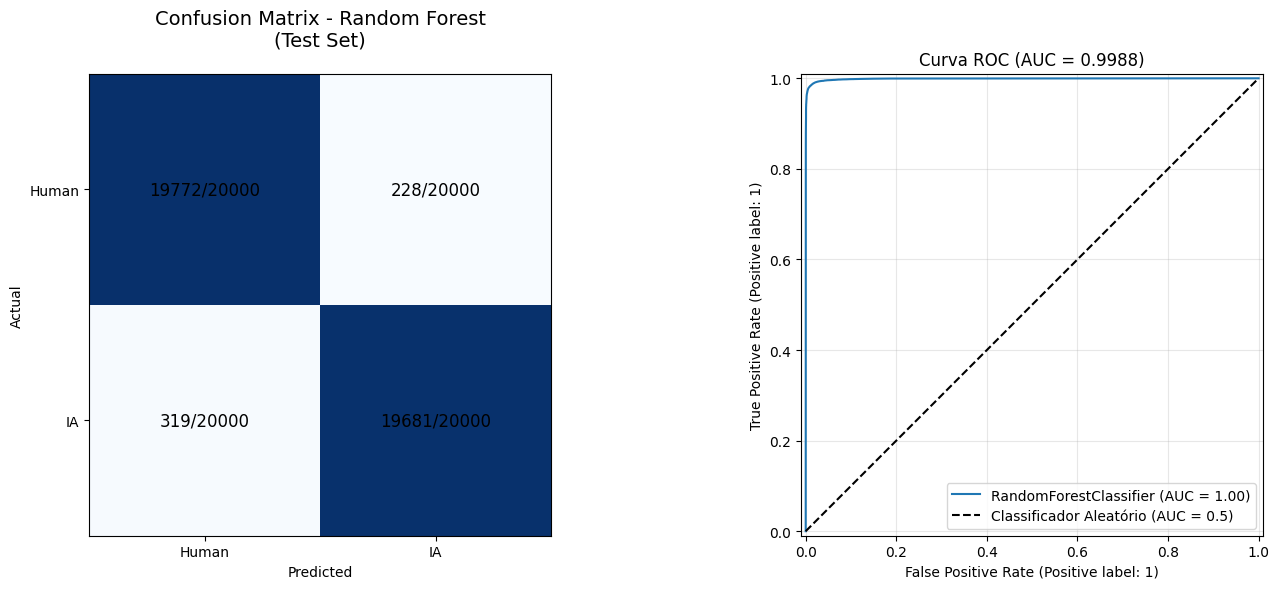

(RandomForestClassifier(n_jobs=-1, random_state=42),
 array([[19772,   228],
        [  319, 19681]]),
 {'test_accuracy': array([0.985475, 0.9864  , 0.9862  , 0.98635 , 0.9879  ]),
  'test_precision': array([0.98784103, 0.98825537, 0.98839779, 0.9884994 , 0.98941719]),
  'test_recall': array([0.98305, 0.9845 , 0.98395, 0.98415, 0.98635]),
  'test_f1': array([0.98543969, 0.98637411, 0.98616888, 0.9863199 , 0.98788122]),
  'test_roc_auc': array([0.99868443, 0.99892135, 0.9986374 , 0.99881619, 0.99892567])})

In [5]:
sml.random_forest_pipeline(X, y)

🔍 Classificação Binária: Classes [0 1]
📊 Distribuição:
   Classe 0: 100000 amostras
   Classe 1: 100000 amostras
🔧 Pré-processamento:
   StandardScaler: 1 features
   MinMaxScaler: 8 features

📊 RESULTADOS DA VALIDAÇÃO CRUZADA (Logistic Regression):
------------------------------------------------------------
accuracy    : 0.9746 ± 0.0007
precision   : 0.9772 ± 0.0009
recall      : 0.9718 ± 0.0010
f1          : 0.9745 ± 0.0007
roc_auc     : 0.9968 ± 0.0001 (baseado em 5/5 folds válidos)

📈 MÉTRICAS NO CONJUNTO DE TESTE:
------------------------------
Accuracy : 0.9738
Precision: 0.9763
Recall   : 0.9711
F1-Score : 0.9737
ROC-AUC  : 0.9964


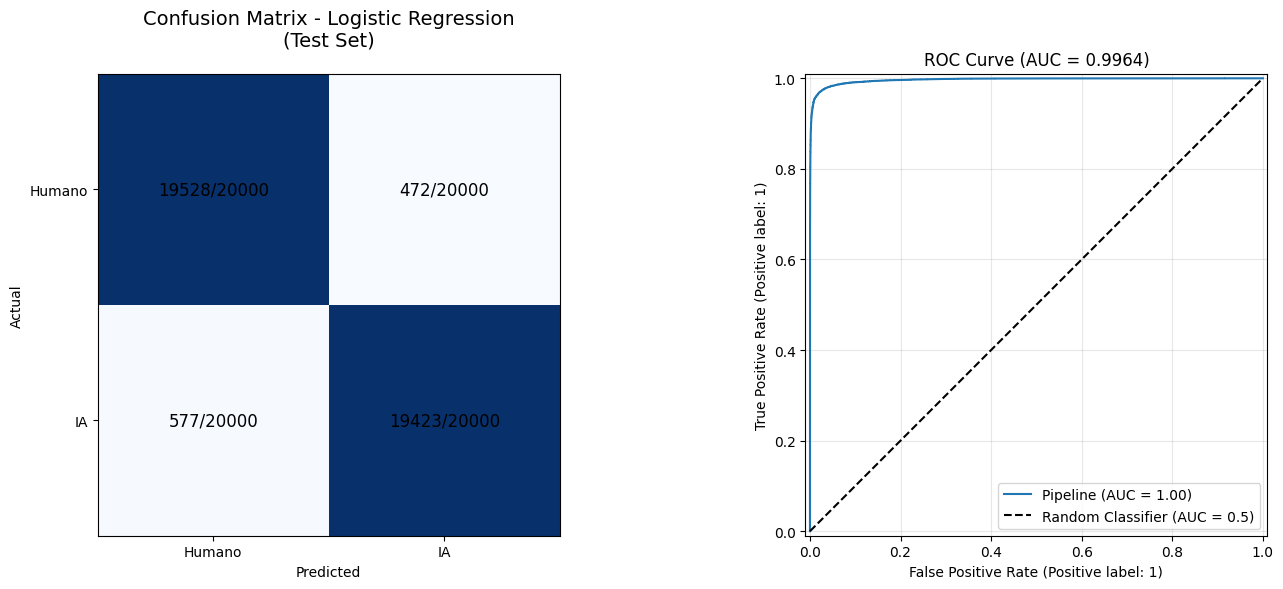


🎯 TOP 15 COEFICIENTES MAIS IMPORTANTES:
----------------------------------------
⚠️  Não foi possível extrair coeficientes: list index out of range


(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('standard', StandardScaler(),
                                                   ['lexical_avg_word_length']),
                                                  ('minmax', MinMaxScaler(),
                                                   ['structural_hashtag_density',
                                                    'structural_extra_spaces',
                                                    'syntactic_punct_ratio',
                                                    'structural_has_hashtag',
                                                    'lexical_word_length_variance',
                                                    'lexical_type_token_ratio',
                                                    'syntactic_pos_tag_entropy',
                                                    'lexical_stopword_ratio'])])),
                 ('cla

In [12]:
sml.logistic_regression_pipeline(X, y, test_size=0.2, random_state=42, cv=5, max_iter=1000)

🔍 Classes: [0 1]
📊 Distribuição: [100000 100000]
🔄 Executando validação cruzada...



📊 RESULTADOS DA VALIDAÇÃO CRUZADA (SVM):
------------------------------------------------------------
accuracy    : 0.9708 ± 0.0019
precision   : 0.9843 ± 0.0021
recall      : 0.9568 ± 0.0056
f1          : 0.9703 ± 0.0020
roc_auc     : 0.9946 ± 0.0006
🔧 Treinando modelo final...

📈 MÉTRICAS NO CONJUNTO DE TESTE:
------------------------------
Accuracy : 0.9748
Precision: 0.9775
Recall   : 0.9720
F1-Score : 0.9747
ROC-AUC  : 0.9964


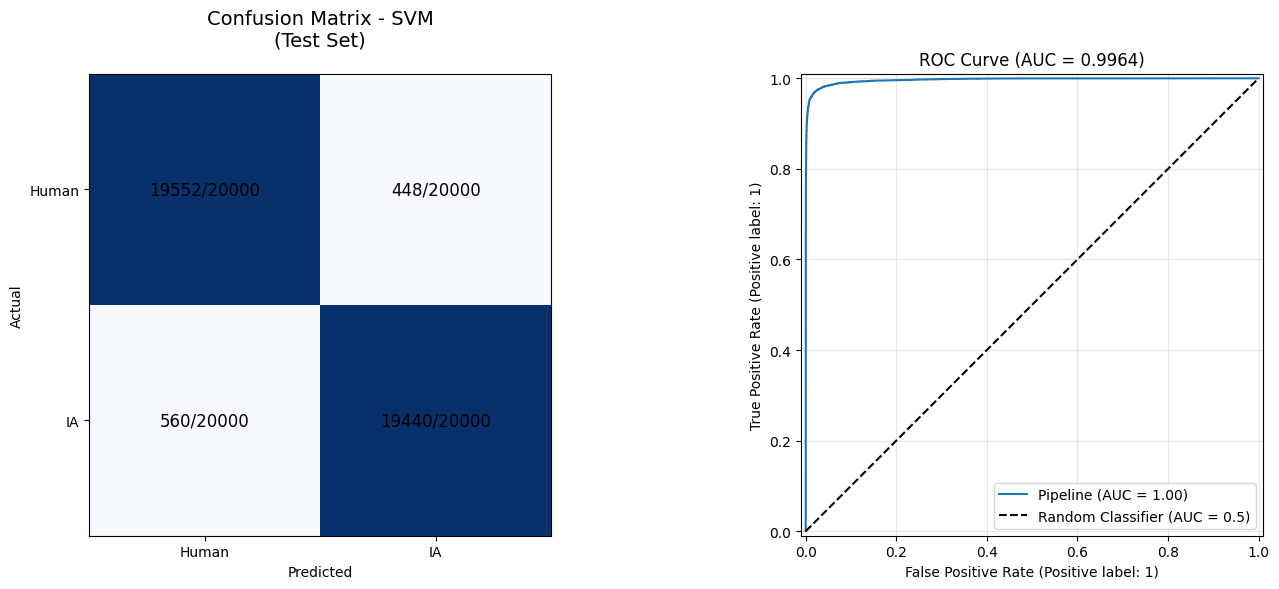

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('scaler', StandardScaler(),
                                                   Index(['structural_has_hashtag', 'stylistic_capitalization_inconsistency.1',
        'structural_hashtag_density', 'lexical_stopword_ratio',
        'lexical_word_length_variance', 'https', 'lexical_avg_word_length',
        'syntactic_avg_sentence_length', 'structural_url_density',
        'stylistic_random_uppercase.1', 'the', 'syntactic_punct_ratio',
        'structural_extra_spaces', 'of', 'syntactic_pos_tag_entropy', 'modi',
        'is', 'in', 'to', 'lexical_type_token_ratio'],
       dtype='object'))])),
                 ('classifier',
                  CalibratedClassifierCV(cv=3,
                                         estimator=SVC(class_weight='balanced',
                                                       kernel='linear',
                           

In [13]:
sml.svm_pipeline(X, y, test_size=0.2, random_state=42, cv=5, kernel="linear")

In [14]:
df = pd.read_csv("/home/tammy.kojima/Authorship-attribution/df_pronto/df_gpt_com_features2.csv")
feature_columns = [col for col in df.columns if col not in ['text', 'origin']]

In [16]:
df= df.drop(columns=['text']) 
df = df.fillna(0)
df

,origin,lexical_type_token_ratio,lexical_word_count,lexical_unique_words,lexical_avg_word_length,lexical_word_length_variance,lexical_stopword_ratio,stylistic_random_uppercase,stylistic_repeated_chars,stylistic_repeated_words,...,vote for,wait,watch,watching,wish,with modi,without,yeah,yes,you have
0,1,0.882353,17,15,5.294118,6.442907,0.411765,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.000000,18,18,6.000000,9.000000,0.277778,0.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.937500,32,30,4.968750,4.655273,0.437500,0.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.727273,22,16,5.409091,8.787190,0.500000,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.923077,13,12,6.153846,7.207101,0.384615,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0.909091,11,10,4.909091,4.264463,0.181818,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199996,0,0.731707,41,30,4.317073,2.070196,0.195122,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199997,0,0.840000,25,21,5.760000,8.502400,0.160000,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199998,0,0.933333,15,14,5.600000,7.173333,0.000000,0.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


📊 Calculando Mutual Information...
🔍 Removendo features redundantes...
   🔄 Removendo 'stylistic_capitalization_inconsistency' (correlacionada com 'stylistic_capitalization_inconsistency.1': 0.924)
   🔄 Removendo 'co' (correlacionada com 'https': 0.893)
   🔄 Removendo 'https co' (correlacionada com 'https': 0.911)
   🔄 Removendo 'structural_has_url' (correlacionada com 'https': 0.888)
   🔄 Removendo 'lexical_unique_words' (correlacionada com 'syntactic_avg_sentence_length': 0.869)
   🔄 Removendo 'lexical_word_count' (correlacionada com 'syntactic_avg_sentence_length': 0.857)
   🔄 Removendo 'stylistic_random_uppercase' (correlacionada com 'stylistic_random_uppercase.1': 1.000)
   🔄 Removendo 'syntactic_pos_bigram_entropy' (correlacionada com 'syntactic_pos_tag_entropy': 0.881)
   🔄 Removendo 'climate change' (correlacionada com 'climate': 0.944)
   🔄 Removendo 'change' (correlacionada com 'climate': 0.932)
   🔄 Removendo 'ai_perplexity_score' (correlacionada com 'lexical_type_token_rati

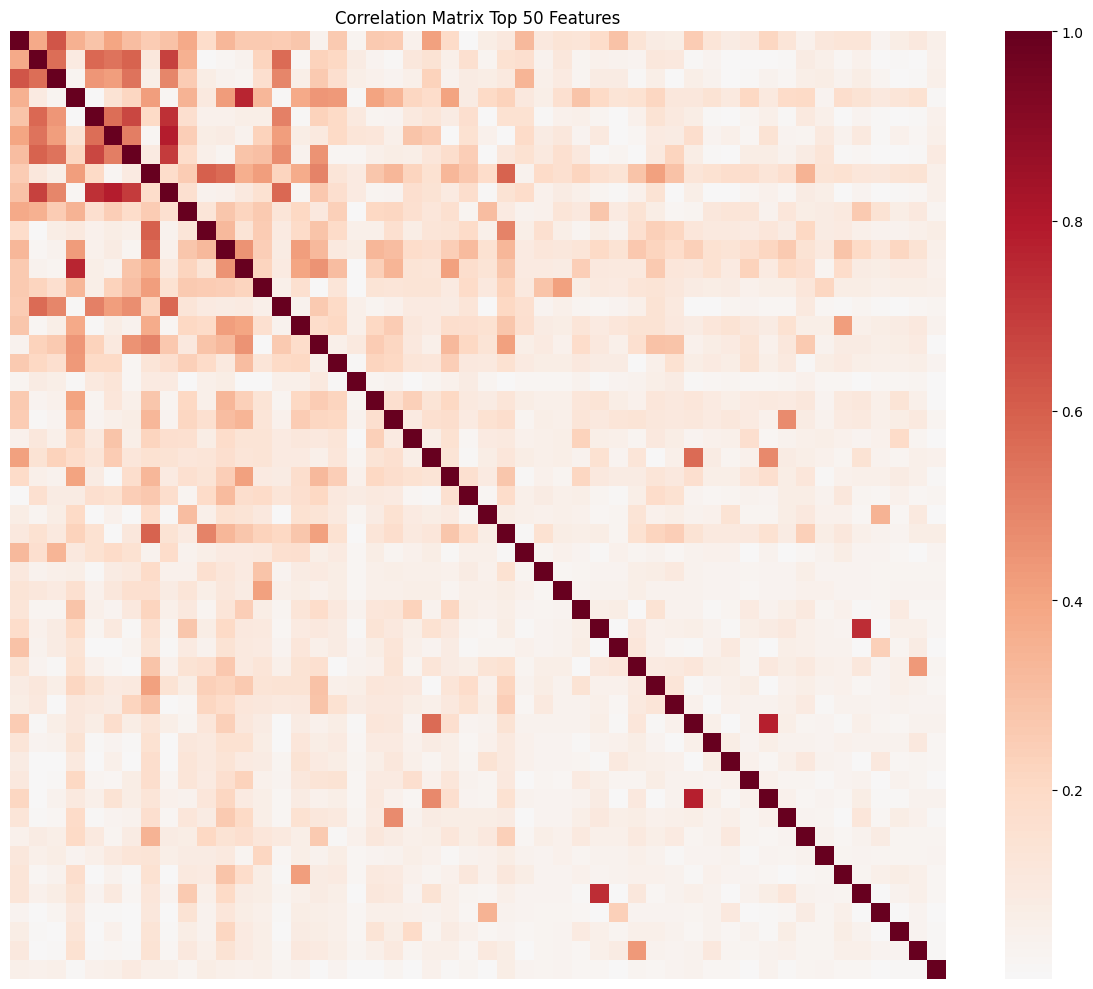


📋 RELATÓRIO FINAL DA SELEÇÃO DE FEATURES
Total de features inicial: 461
Features após MI: 461
Features após remoção de redundâncias: 426


In [17]:
# Exemplo de uso:
mi_df_final = sml.validate_feature_selection(
    df=df,
    feature_names=feature_columns,
    target='origin',
    top_n_range=range(10, 101, 10),  # Testa de 10 a 100 features em steps de 10
    cv_folds=5,
    correlation_threshold=0.8
)
mi_df_final
mi_df_final.to_csv("/home/tammy.kojima/Authorship-attribution/df_pronto/top_features_gpt2.csv", index=False)

In [15]:
top_features = pd.read_csv("/home/tammy.kojima/Authorship-attribution/df_pronto/top_features_gpt2.csv")
top20_features = top_features.head(20)

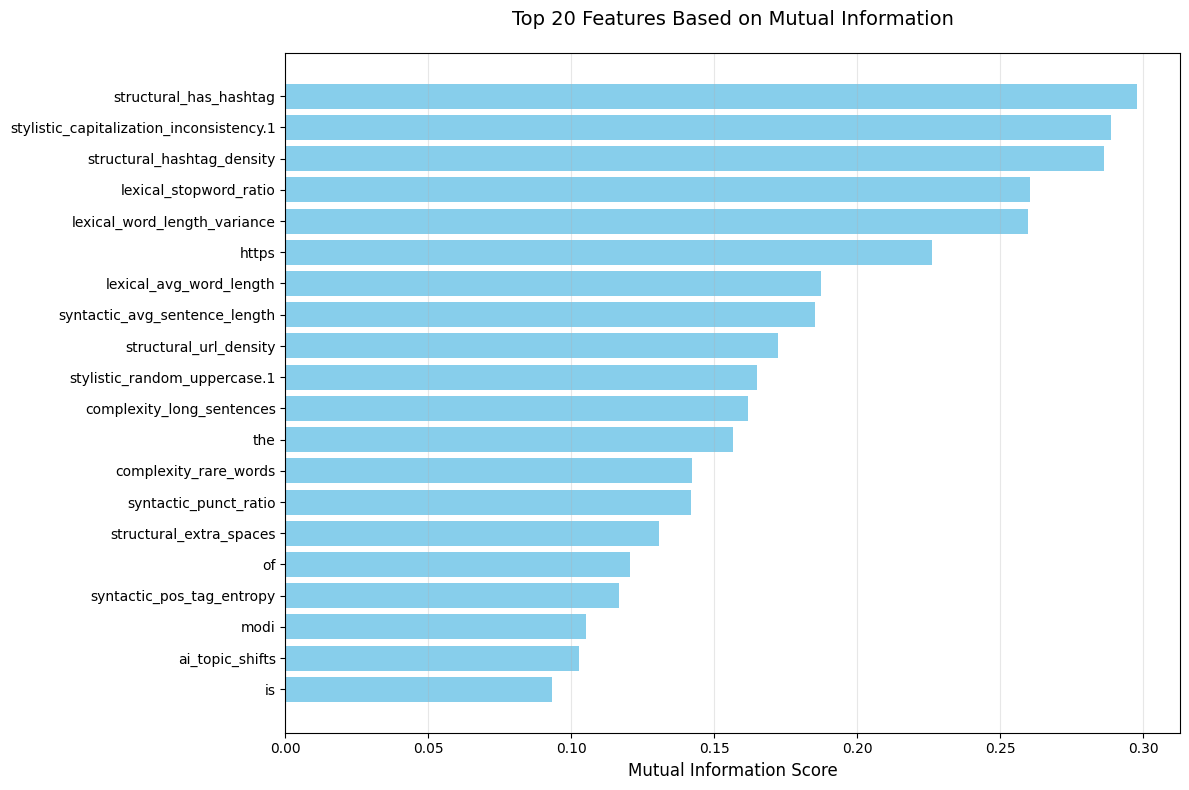

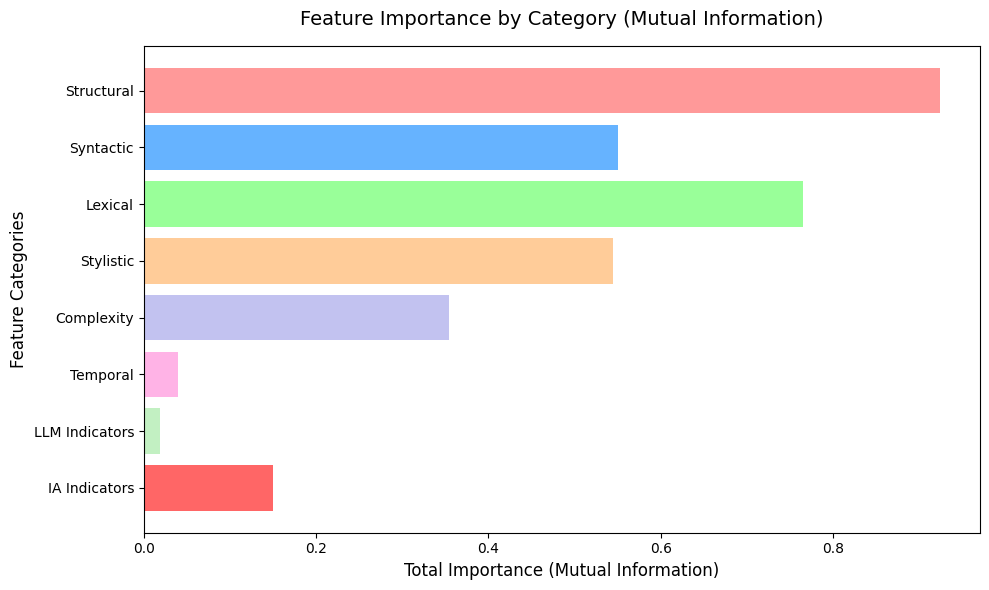

In [19]:
categories = {
    'Structural': ['structural'],
    'Syntactic': ['syntactic'],
    'Lexical': ['lexical'],
    'Stylistic': ['stylistic'],
    'Complexity': ['complexity'],
    'Temporal': ['temporal'],
    'LLM Indicators': ['llm', 'chatgpt'],
    'IA Indicators': ['ai']
}
sml.plot_feature_20importance(top20_features)
sml.plot_feature_importance(top_features, top_n=20, categories=categories)


In [16]:
X = df[top20_features['feature'].tolist()]
y = df['origin']


📊 RESULTADOS DA VALIDAÇÃO CRUZADA:
----------------------------------------
accuracy    : 0.9880 ± 0.0009
precision   : 0.9895 ± 0.0008
recall      : 0.9866 ± 0.0010
f1          : 0.9880 ± 0.0009
roc_auc     : 0.9988 ± 0.0002 (baseado em 5/5 folds válidos)

📈 MÉTRICAS NO CONJUNTO DE TESTE:
------------------------------
Accuracy : 0.9884
Precision: 0.9901
Recall   : 0.9867
F1-Score : 0.9884
ROC-AUC  : 0.9990


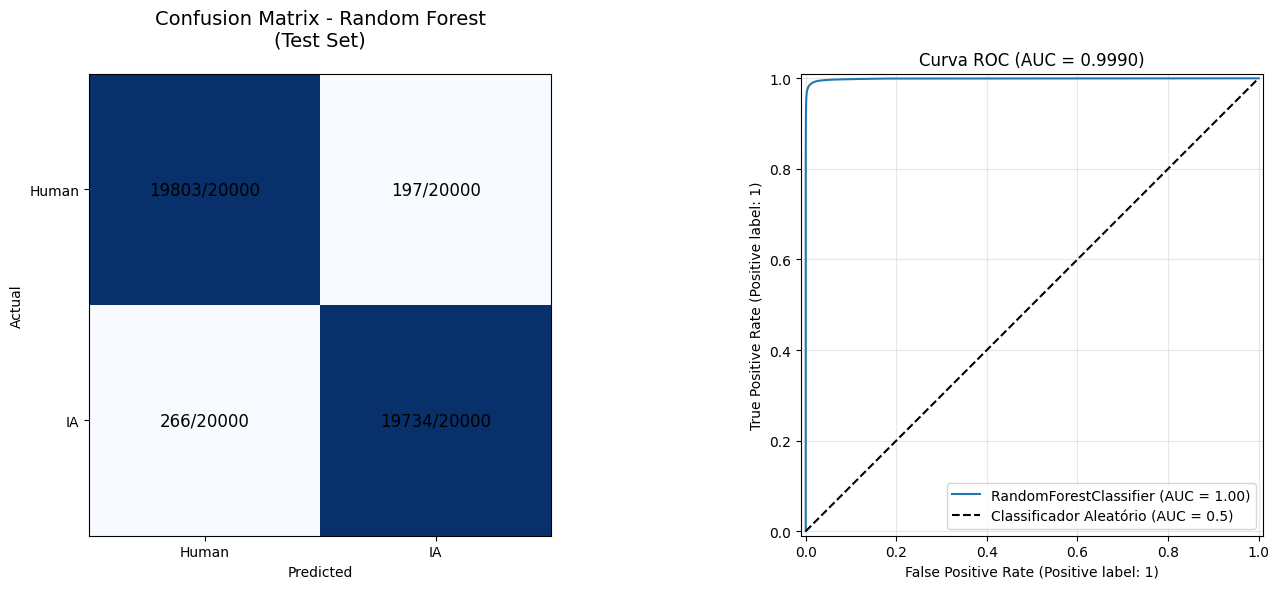

(RandomForestClassifier(n_jobs=-1, random_state=42),
 array([[19803,   197],
        [  266, 19734]]),
 {'test_accuracy': array([0.987525, 0.9875  , 0.987475, 0.987925, 0.989775]),
  'test_precision': array([0.98882037, 0.98881981, 0.9892117 , 0.98951593, 0.99092868]),
  'test_recall': array([0.9862 , 0.98615, 0.9857 , 0.9863 , 0.9886 ]),
  'test_f1': array([0.98750845, 0.9874831 , 0.98745273, 0.98790535, 0.98976297]),
  'test_roc_auc': array([0.99865957, 0.99890949, 0.99867294, 0.99894303, 0.99903379])})

In [17]:
sml.random_forest_pipeline(X, y, test_size=0.2, random_state=42, n_estimators=100)

🔍 Classificação Binária: Classes [0 1]
📊 Distribuição:
   Classe 0: 100000 amostras
   Classe 1: 100000 amostras
🔧 Pré-processamento:
   StandardScaler: 1 features
   MinMaxScaler: 7 features

📊 RESULTADOS DA VALIDAÇÃO CRUZADA (Logistic Regression):
------------------------------------------------------------
accuracy    : 0.9737 ± 0.0005
precision   : 0.9758 ± 0.0008
recall      : 0.9715 ± 0.0009
f1          : 0.9736 ± 0.0005
roc_auc     : 0.9966 ± 0.0001 (baseado em 5/5 folds válidos)

📈 MÉTRICAS NO CONJUNTO DE TESTE:
------------------------------
Accuracy : 0.9728
Precision: 0.9751
Recall   : 0.9703
F1-Score : 0.9727
ROC-AUC  : 0.9962


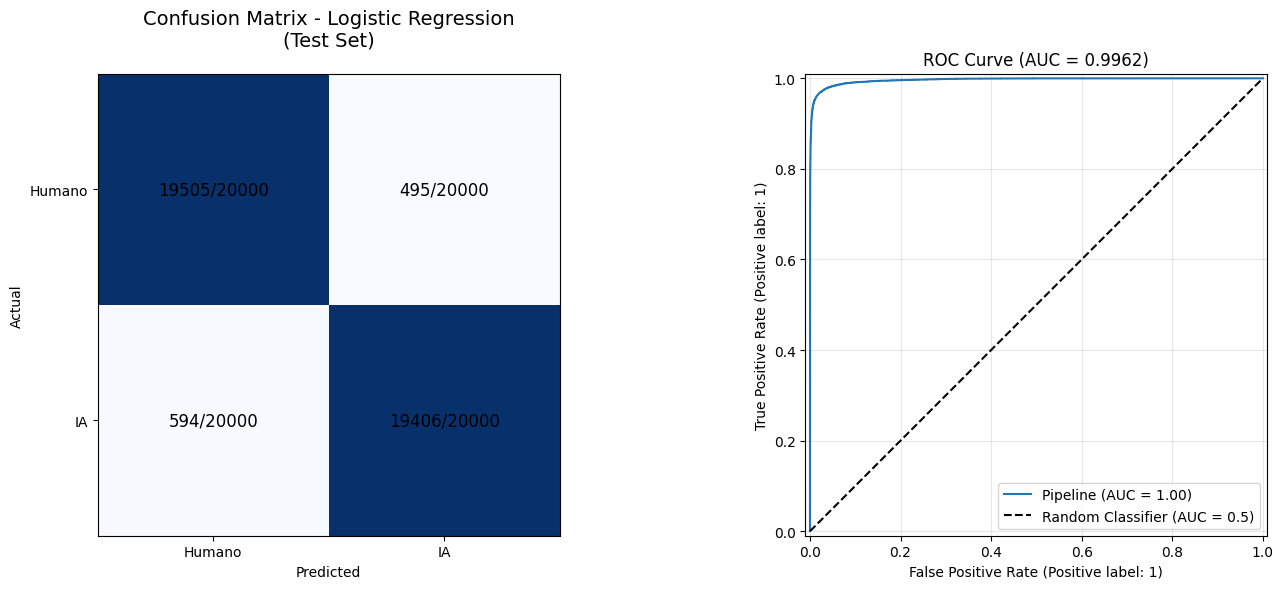


🎯 TOP 15 COEFICIENTES MAIS IMPORTANTES:
----------------------------------------
⚠️  Não foi possível extrair coeficientes: list index out of range


(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('standard', StandardScaler(),
                                                   ['lexical_avg_word_length']),
                                                  ('minmax', MinMaxScaler(),
                                                   ['structural_hashtag_density',
                                                    'structural_extra_spaces',
                                                    'syntactic_punct_ratio',
                                                    'structural_has_hashtag',
                                                    'lexical_word_length_variance',
                                                    'syntactic_pos_tag_entropy',
                                                    'lexical_stopword_ratio'])])),
                 ('classifier',
                  LogisticRegression(class_weight='balanced', max_iter

In [20]:
sml.logistic_regression_pipeline(X, y, test_size=0.2, random_state=42, cv=5, max_iter=1000)

🔍 Classes: [0 1]
📊 Distribuição: [100000 100000]
🔄 Executando validação cruzada...



📊 RESULTADOS DA VALIDAÇÃO CRUZADA (SVM):
------------------------------------------------------------
accuracy    : 0.9715 ± 0.0028
precision   : 0.9795 ± 0.0035
recall      : 0.9633 ± 0.0092
f1          : 0.9713 ± 0.0031
roc_auc     : 0.9942 ± 0.0006
🔧 Treinando modelo final...

📈 MÉTRICAS NO CONJUNTO DE TESTE:
------------------------------
Accuracy : 0.9735
Precision: 0.9752
Recall   : 0.9717
F1-Score : 0.9734
ROC-AUC  : 0.9962


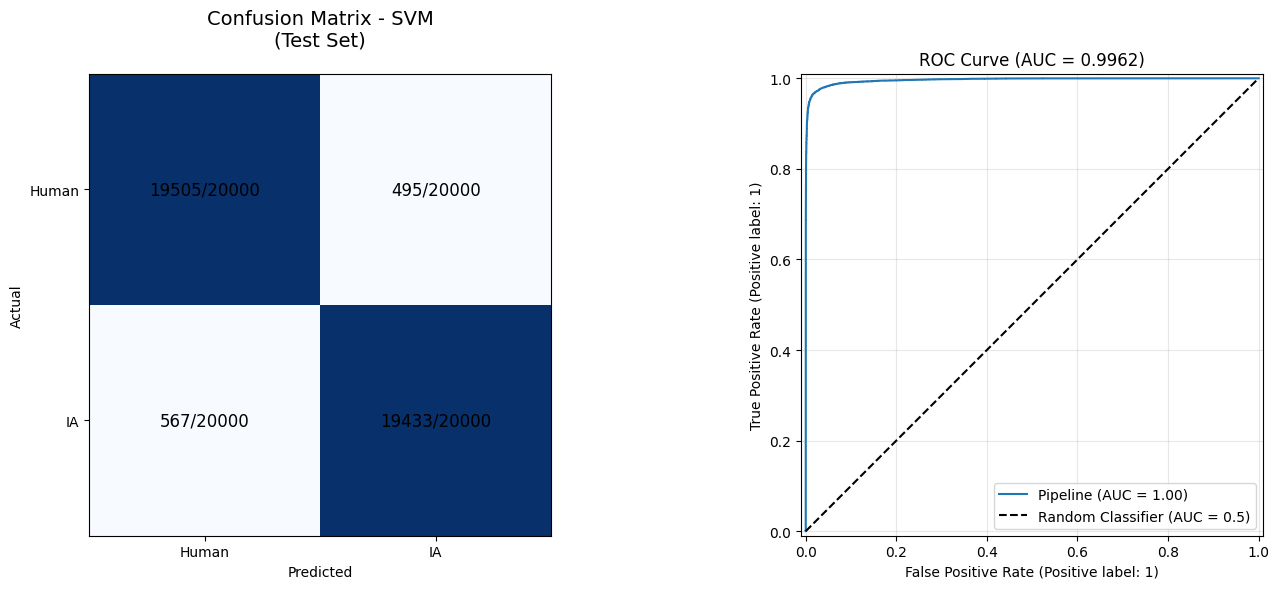

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('scaler', StandardScaler(),
                                                   Index(['structural_has_hashtag', 'stylistic_capitalization_inconsistency.1',
        'structural_hashtag_density', 'lexical_stopword_ratio',
        'lexical_word_length_variance', 'https', 'lexical_avg_word_length',
        'syntactic_avg_sentence_length', 'structur...l_density',
        'stylistic_random_uppercase.1', 'complexity_long_sentences', 'the',
        'complexity_rare_words', 'syntactic_punct_ratio',
        'structural_extra_spaces', 'of', 'syntactic_pos_tag_entropy', 'modi',
        'ai_topic_shifts', 'is'],
       dtype='object'))])),
                 ('classifier',
                  CalibratedClassifierCV(cv=3,
                                         estimator=SVC(class_weight='balanced',
                                                       kerne

In [21]:
sml.svm_pipeline(X, y, test_size=0.2, random_state=42, cv=5, kernel="linear")

In [24]:
df.value_counts('origin')

origin
0    100000
1    100000
Name: count, dtype: int64